# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [1]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [2]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    # YOUR CODE HERE
    import numpy as np 
    return x**2*np.sin(x)

Ensure your function works with numpy arrays:

In [3]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [4]:
def g(x):
    '''Analytical integral of f(x).'''
    # YOUR CODE HERE
    import numpy as np
    return 2*x*np.sin(x) - (x**2 - 2)*np.cos(x) - 2                                                      

Check your solution with the same numpy array:

In [5]:
assert g(0) == 0.

In [6]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [7]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    # YOUR CODE HERE
    return g(xmax)-g(xmin)

Check your analytic function:

In [8]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [9]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    # YOUR CODE HERE
    if N<1:
        print("Please enter an integer, N, greater than 0")
        quit()
    elif N!=int(N):
        print("Please enter an integer, N, greater than 0")
    else:
        h=(xmax-xmin)/((2*N))
        
        panels=numpy.zeros(N)
        for i in range(0,N):
            panels[i]=f(xmin+(2*i*h))+4*f(xmin+(h+2*i*h))+f(xmin+(2*h+2*i*h))
            
        simpson=(numpy.sum(panels))*h/3
        
        return simpson
    
        

Make sure you have implemented Simpson's rule correctly:

In [10]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [11]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


Text(0.5,1,'The difference between numerical and analytical integration')

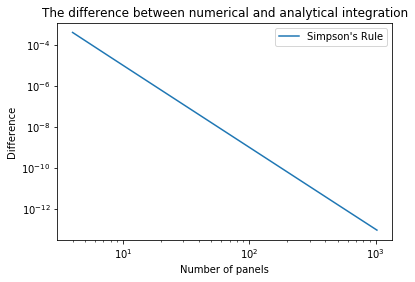

In [12]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
result_numeric=numpy.zeros(9)
for i in range(0,9):
    result_numeric[i]=integrate_numeric(x0,x1,panel_counts[i])
fig,ax=plt.subplots()
plt.loglog(panel_counts, result_analytic-result_numeric)
plt.xlabel("Number of panels")
plt.ylabel("Difference")
plt.legend(["Simpson's Rule"])
plt.title("The difference between numerical and analytical integration")

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

Increasing the number of panels greatly reduces the error on the difference as the error follows N^-4 bevhaviour when using the simpson approximation. This then becomes a straight line in the logarithmic graph.
On the other hand, if there are too many panels used, the error becomes inconsistent and irregular more so than with fewer panels. The limit for simpson rule is around 10^5 when in a small integral range due to the 5d.p. rounding errors present in python.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

The trapezium rule has an error trend that follows N^-2. The use of more panels would increase accuracy but the simpson rule is generally more accurate for the same number or panels.
The error using the trapezium rule can become irrecular again if there are too many panels used (in the range of 10^6) in a small integral range. This can be attributed to python's rounding error as making N very large causes h to be very small.